In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [23]:
df = pd.read_csv('/content/drive/MyDrive/YOGI/ai4i2020.csv')
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

Penghapusan Karakter Tanda Kurung dari Nama Kolom dalam Dataframe

In [4]:
df.columns = df.columns.str.replace('\[', '', regex=True).str.replace('\]', '', regex=True)
print("\nColumns after cleaning:")
print(df.columns)


Columns after cleaning:
Index(['UDI', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


Penggantian Nilai Hilang, Konversi Tipe Data, dan Seleksi Kolom Numerik dalam Dataframe

In [11]:
df.replace("?",np.nan,inplace=True)
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


Langkah-langkah Pra-Pemrosesan Data dengan Pengisian Nilai Hilang dan Pembuatan Dummy Variables

In [12]:

df = pd.get_dummies(df,drop_first=True)
features = list(df.columns)
df_group = df.groupby(['Machine failure'])

df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df.fillna({feature : df[feature].mean()}, inplace=True)
    except:
        try:
            df.fillna({feature : df[feature].mode()}, inplace=True)
        except:
            pass


df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
...,...,...,...,...,...,...,...,...,...,...,...
Product ID_M24855,10000,2,False,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product ID_M24857,10000,2,False,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product ID_M24859,10000,2,False,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type_L,10000,2,True,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalisasi


In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 10012)

Visualisasi Confusion Matrix

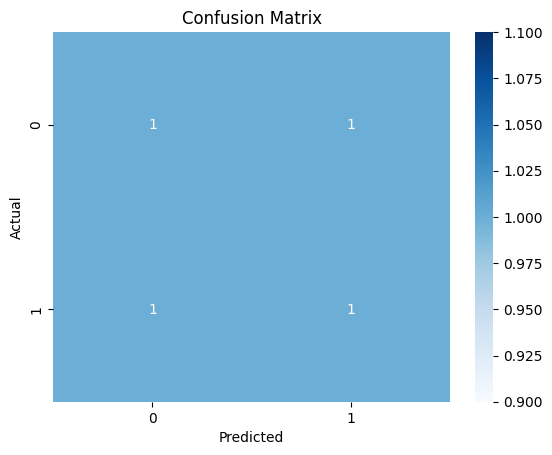

In [17]:

y_true = [0, 1, 0, 1]
y_pred = [1, 1, 0, 0]
conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

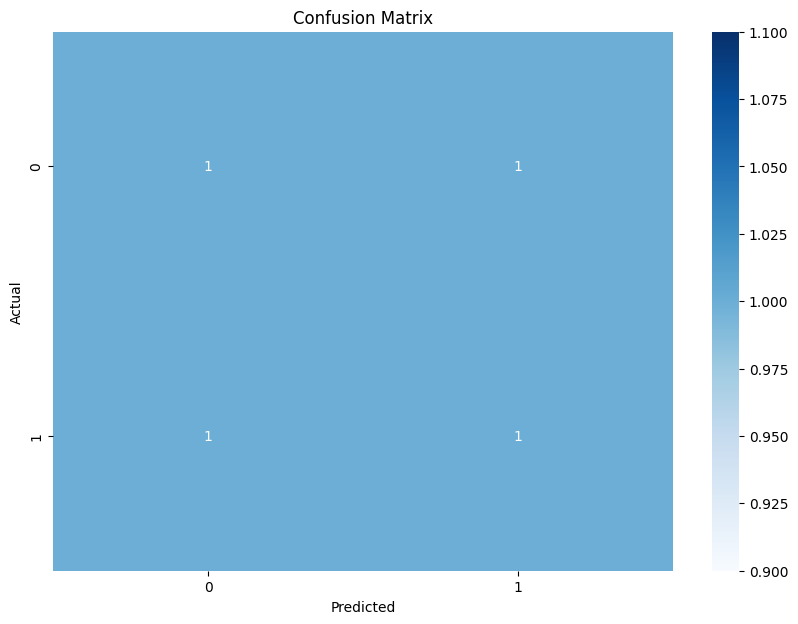

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()